# 4. Aprendizaje No Supervisado

El aprendizaje no supervisado es un enfoque donde el modelo intenta encontrar patrones o estructuras ocultas en los datos sin necesidad de etiquetas predefinidas. Una de las técnicas más comunes en este enfoque es el clustering, que agrupa los datos en clusters o grupos según sus similitudes.

## 4.1. Clustering

El clustering es el proceso de agrupar un conjunto de objetos de tal manera que los objetos en el mismo grupo (o cluster) sean más similares entre sí que con los de otros grupos. Es útil en una variedad de aplicaciones como segmentación de mercado, análisis de redes sociales, y agrupación de imágenes similares.

### 4.1.1. K-means

K-means es uno de los algoritmos de clustering más utilizados debido a su simplicidad y eficiencia. Su objetivo es dividir un conjunto de datos en $K$ clusters donde cada punto pertenece al cluster con el centroide más cercano.

#### 4.1.1.1. Algoritmo y convergencia

El algoritmo K-means sigue estos pasos:

1. **Inicialización:** Seleccionar $K$ puntos como centroides iniciales (puntos de referencia para cada cluster).
2. **Asignación:** Asignar cada punto de datos al centroide más cercano, formando $K$ clusters.
3. **Actualización:** Calcular los nuevos centroides como el promedio de los puntos asignados a cada cluster.
4. **Repetición:** Repetir los pasos 2 y 3 hasta que los centroides no cambien significativamente (convergencia) o se alcance un número máximo de iteraciones.

##### 4.1.1.1.1. Inicialización de centroides (método de Forgy, k-means++)

La forma en que se eligen los centroides iniciales puede afectar significativamente la calidad del clustering:

- **Método de Forgy:** Selecciona $K$ puntos al azar del conjunto de datos como centroides iniciales. Aunque es simple, puede llevar a resultados subóptimos si los centroides iniciales están mal distribuidos.
  
- **K-means++:** Mejora la inicialización seleccionando de forma inteligente los centroides iniciales, de manera que se maximice la distancia entre ellos. Esto generalmente conduce a una mejor convergencia y soluciones de mayor calidad.

##### 4.1.1.1.2. Complejidad computacional y optimizaciones

El algoritmo K-means tiene una complejidad computacional de $O(n \cdot k \cdot d \cdot i)$, donde:
- $n$ es el número de puntos de datos.
- $k$ es el número de clusters.
- $d$ es la dimensión de los datos.
- $i$ es el número de iteraciones.

Optimizaciones como la inicialización k-means++ y el uso de estructuras de datos avanzadas pueden reducir el tiempo de convergencia y mejorar la eficiencia del algoritmo.

#### 4.1.1.2. Implementación y visualización en Python

##### 4.1.1.2.1. Uso de scikit-learn para K-means

Imaginemos que estamos trabajando con datos de clientes de un supermercado y queremos segmentarlos en diferentes grupos según su comportamiento de compra.

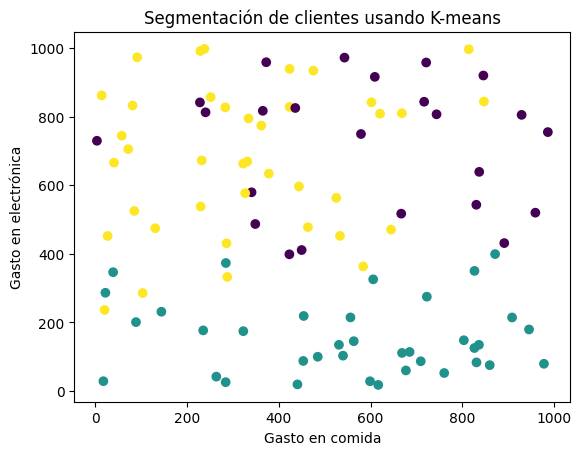

In [6]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Datos de ejemplo: clientes y su gasto anual en diferentes categorías
data = {
    'Gasto_comida': np.random.rand(100) * 1000,
    'Gasto_electrónica': np.random.rand(100) * 1000,
    'Gasto_ropa': np.random.rand(100) * 1000
}
df = pd.DataFrame(data)

# Aplicación del algoritmo K-means
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

# Visualización de los clusters
plt.scatter(df['Gasto_comida'], df['Gasto_electrónica'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Gasto en comida')
plt.ylabel('Gasto en electrónica')
plt.title('Segmentación de clientes usando K-means')
plt.show()


En este ejemplo, los clientes se agrupan en 3 clusters según su gasto en diferentes categorías. Cada cluster representa un grupo de clientes con comportamientos de compra similares.

##### 4.1.1.2.2. Elbow method para selección de K

El número $K$ de clusters es un parámetro crítico en K-means. El **Elbow method** es una técnica visual que ayuda a seleccionar el número óptimo de clusters. Este método evalúa la suma de las distancias cuadradas dentro de los clusters (inercia) y busca un punto donde agregar más clusters no mejora significativamente la inercia.


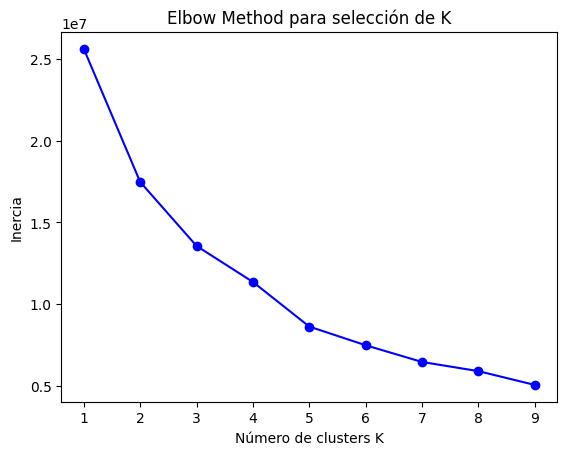

In [7]:
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df[['Gasto_comida', 'Gasto_electrónica', 'Gasto_ropa']])
    inertia.append(kmeans.inertia_)

# Visualización del Elbow method
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Número de clusters K')
plt.ylabel('Inercia')
plt.title('Elbow Method para selección de K')
plt.show()

En la gráfica del Elbow method, el punto donde la inercia deja de disminuir de manera significativa (el "codo") sugiere un buen número de clusters $K$ para el modelo.

El algoritmo K-means es una herramienta poderosa y ampliamente utilizada en clustering, especialmente en escenarios donde se necesita segmentar datos en grupos significativos. La inicialización inteligente de centroides y la correcta selección de $K$ son fundamentales para lograr un buen rendimiento y resultados útiles en aplicaciones del mundo real, como la segmentación de clientes, análisis de imágenes y más.

### 4.1.2. Clustering jerárquico

El clustering jerárquico es una técnica que agrupa los datos en una estructura de árbol, donde los niveles superiores del árbol representan clusters más generales y los niveles inferiores representan clusters más específicos. Este enfoque es útil cuando se desea entender la estructura jerárquica o la relación entre los datos a diferentes niveles de granularidad.

#### 4.1.2.1. Métodos aglomerativos y divisivos

Existen dos enfoques principales en el clustering jerárquico:

- **Métodos aglomerativos:** Comienzan considerando cada punto de datos como un cluster individual. Luego, en cada paso, los clusters más cercanos se fusionan hasta que todos los puntos están en un solo cluster o se alcanza el número deseado de clusters. Este es el enfoque más común.
  
- **Métodos divisivos:** Comienzan con todos los puntos en un solo cluster y, en cada paso, dividen el cluster más grande hasta que todos los puntos están en clusters individuales o se alcanza el número deseado de clusters. Este enfoque es menos común debido a su mayor complejidad computacional.

##### 4.1.2.1.1. Métricas de distancia (euclidiana, Manhattan, coseno)

La elección de la métrica de distancia es crucial en el clustering jerárquico, ya que determina cómo se calcula la similitud entre dos puntos o clusters:

- **Distancia euclidiana:** Es la distancia "recta" entre dos puntos en un espacio n-dimensional. Es la métrica más común y se calcula como:

  $$
  d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
  $$

- **Distancia de Manhattan:** Es la suma de las distancias absolutas entre las coordenadas correspondientes de dos puntos. Es útil en entornos donde las dimensiones representan rutas que no se pueden acortar diagonalmente.

  $$
  d(x, y) = \sum_{i=1}^{n} |x_i - y_i|
  $$

- **Distancia del coseno:** Mide el ángulo entre dos vectores, más que la distancia real entre ellos. Es útil cuando la magnitud de los datos no es importante, sino su dirección.

  $$
  d(x, y) = 1 - \frac{x \cdot y}{\|x\| \|y\|}
  $$

##### 4.1.2.1.2. Criterios de linkage (single, complete, average)

El criterio de linkage determina cómo se calcula la distancia entre clusters durante el proceso de fusión:

- **Single linkage:** La distancia entre dos clusters se define como la distancia mínima entre los puntos en los dos clusters. Tiende a formar clusters alargados y puede ser sensible al ruido.

  $$
  d(A, B) = \min \{ d(x, y) \mid x \in A, y \in B \}
  $$

- **Complete linkage:** La distancia entre dos clusters se define como la distancia máxima entre los puntos en los dos clusters. Este método tiende a formar clusters más compactos.

  $$
  d(A, B) = \max \{ d(x, y) \mid x \in A, y \in B \}
  $$

- **Average linkage:** La distancia entre dos clusters se define como el promedio de todas las distancias entre los puntos en los dos clusters. Es un compromiso entre single y complete linkage.

  $$
  d(A, B) = \frac{1}{|A| \times |B|} \sum_{x \in A} \sum_{y \in B} d(x, y)
  $$

#### 4.1.2.2. Dendrogramas y selección de clusters

Un **dendrograma** es una representación visual de los resultados del clustering jerárquico. Muestra cómo los clusters se fusionan o se dividen a diferentes niveles de similitud. Los dendrogramas son útiles para determinar el número óptimo de clusters en los datos.

##### 4.1.2.2.1. Interpretación de dendrogramas

En un dendrograma:

- **Altura de la fusión:** La altura a la que se unen dos clusters indica la distancia entre ellos. Cuanto más baja es la fusión, más similares son los clusters.
  
- **Corte del dendrograma:** Al cortar el dendrograma a una cierta altura, se pueden identificar los clusters en el nivel de similitud deseado. Este corte determina el número de clusters.

##### 4.1.2.2.2. Implementación en Python con scipy

Aquí hay un ejemplo práctico de cómo realizar clustering jerárquico e interpretar un dendrograma utilizando Python y la biblioteca `scipy`.


### 4.1.2. Clustering jerárquico

El clustering jerárquico es una técnica que agrupa los datos en una estructura de árbol, donde los niveles superiores del árbol representan clusters más generales y los niveles inferiores representan clusters más específicos. Este enfoque es útil cuando se desea entender la estructura jerárquica o la relación entre los datos a diferentes niveles de granularidad.

#### 4.1.2.1. Métodos aglomerativos y divisivos

Existen dos enfoques principales en el clustering jerárquico:

- **Métodos aglomerativos:** Comienzan considerando cada punto de datos como un cluster individual. Luego, en cada paso, los clusters más cercanos se fusionan hasta que todos los puntos están en un solo cluster o se alcanza el número deseado de clusters. Este es el enfoque más común.
  
- **Métodos divisivos:** Comienzan con todos los puntos en un solo cluster y, en cada paso, dividen el cluster más grande hasta que todos los puntos están en clusters individuales o se alcanza el número deseado de clusters. Este enfoque es menos común debido a su mayor complejidad computacional.

##### 4.1.2.1.1. Métricas de distancia (euclidiana, Manhattan, coseno)

La elección de la métrica de distancia es crucial en el clustering jerárquico, ya que determina cómo se calcula la similitud entre dos puntos o clusters:

- **Distancia euclidiana:** Es la distancia "recta" entre dos puntos en un espacio n-dimensional. Es la métrica más común y se calcula como:

  $$
  d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
  $$

- **Distancia de Manhattan:** Es la suma de las distancias absolutas entre las coordenadas correspondientes de dos puntos. Es útil en entornos donde las dimensiones representan rutas que no se pueden acortar diagonalmente.

  $$
  d(x, y) = \sum_{i=1}^{n} |x_i - y_i|
  $$

- **Distancia del coseno:** Mide el ángulo entre dos vectores, más que la distancia real entre ellos. Es útil cuando la magnitud de los datos no es importante, sino su dirección.

  $$
  d(x, y) = 1 - \frac{x \cdot y}{\|x\| \|y\|}
  $$

##### 4.1.2.1.2. Criterios de linkage (single, complete, average)

El criterio de linkage determina cómo se calcula la distancia entre clusters durante el proceso de fusión:

- **Single linkage:** La distancia entre dos clusters se define como la distancia mínima entre los puntos en los dos clusters. Tiende a formar clusters alargados y puede ser sensible al ruido.

  $$
  d(A, B) = \min \{ d(x, y) \mid x \in A, y \in B \}
  $$

- **Complete linkage:** La distancia entre dos clusters se define como la distancia máxima entre los puntos en los dos clusters. Este método tiende a formar clusters más compactos.

  $$
  d(A, B) = \max \{ d(x, y) \mid x \in A, y \in B \}
  $$

- **Average linkage:** La distancia entre dos clusters se define como el promedio de todas las distancias entre los puntos en los dos clusters. Es un compromiso entre single y complete linkage.

  $$
  d(A, B) = \frac{1}{|A| \times |B|} \sum_{x \in A} \sum_{y \in B} d(x, y)
  $$

#### 4.1.2.2. Dendrogramas y selección de clusters

Un **dendrograma** es una representación visual de los resultados del clustering jerárquico. Muestra cómo los clusters se fusionan o se dividen a diferentes niveles de similitud. Los dendrogramas son útiles para determinar el número óptimo de clusters en los datos.

##### 4.1.2.2.1. Interpretación de dendrogramas

En un dendrograma:

- **Altura de la fusión:** La altura a la que se unen dos clusters indica la distancia entre ellos. Cuanto más baja es la fusión, más similares son los clusters.
  
- **Corte del dendrograma:** Al cortar el dendrograma a una cierta altura, se pueden identificar los clusters en el nivel de similitud deseado. Este corte determina el número de clusters.

##### 4.1.2.2.2. Implementación en Python con scipy

Aquí hay un ejemplo práctico de cómo realizar clustering jerárquico e interpretar un dendrograma utilizando Python y la biblioteca `scipy`.



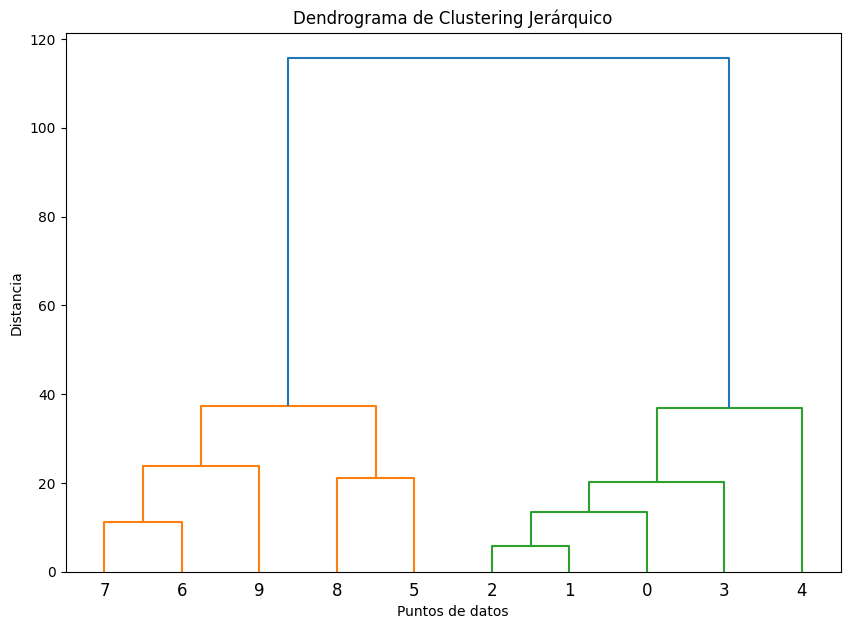

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Datos de ejemplo: características de clientes
data = np.array([[5, 3], [10, 15], [15, 12], [24, 10], [30, 30], [85, 70], [71, 80], [60, 78], [70, 55], [80, 91]])

# Realizar clustering jerárquico
linked = linkage(data, method='complete', metric='euclidean')

# Dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia')
plt.show()

En este ejemplo, los puntos de datos representan características de clientes. El dendrograma resultante visualiza cómo estos clientes se agrupan en diferentes niveles de similitud, permitiendo identificar el número óptimo de clusters.

El clustering jerárquico es una técnica poderosa para explorar la estructura jerárquica en los datos. A través de diferentes métricas de distancia y criterios de linkage, se pueden formar clusters con diferentes características y granularidades. Los dendrogramas proporcionan una herramienta visual para seleccionar el número óptimo de clusters, haciendo de este enfoque una opción flexible y fácil de interpretar en aplicaciones del mundo real.